# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [55]:
#Here is the code to load the data

%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston


boston = load_boston()
bos = pd.DataFrame(boston.data)

In [56]:
#The object boston is a dictionary, explore the keys of this dictionary.
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [57]:
boston.data.shape

(506, 13)

In [58]:
bos.shape

(506, 13)

In [59]:
# print the feature names of boston data set.
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [60]:
# see the description of the database
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [61]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
#replace those numbers with the feature names.
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [63]:
# boston.target contains the housing prices.
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [64]:
#add these target prices to the bos data frame.
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Scikit Learn
fit a linear regression model and predict the Boston housing prices. 

use the least squares method as the way to estimate the coefficients.

Y = boston housing price(also called “target” data in Python)

and

X = all the other features (or independent variables)

In [65]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1 )
#create a linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Important functions to keep in mind while fitting a linear regression model are:

lm.fit() -> fits a linear model

lm.predict() -> Predict Y using the linear model with estimated coefficients

lm.score() -> Returns the coefficient of determination (R^2). 
A measure of how well observed outcomes are replicated by the model,

as the proportion of total variation of outcomes explained by the model.

In [66]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
#print the intercept and number of coefficients
print('Estimated intercept coefficient: ', lm.intercept_)
print('Number of coefficients: ', len(lm.coef_))

Estimated intercept coefficient:  36.45948838509015
Number of coefficients:  13


# construct a data frame that contains features and estimated coefficients.

In [68]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


#  can see from the data frame that there is a high correlation between RM and prices. 
 Lets plot a scatter plot between True housing prices and True RM.

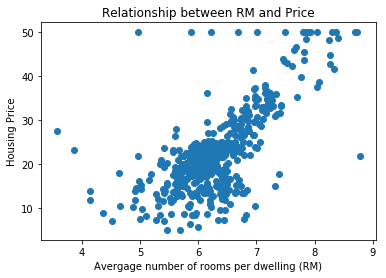

In [69]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Avergage number of rooms per dwelling (RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')
plt.show()

# see that there is a positive correlation between RM and housing prices.

# Predicting Prices

In [70]:
lm.predict(X)[:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

# plot a scatter plot to compare true prices and the predicted prices.

Text(0.5,1,'Prices Vs Predicted Prices: $Y_i$ Vs $\\hat{Y}_i$')

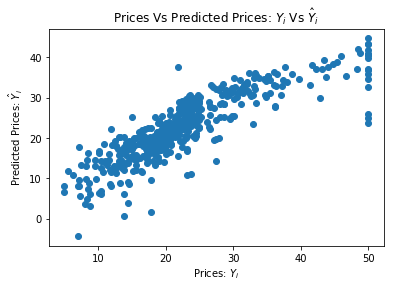

In [71]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Prices: $\hat{Y}_i$')
plt.title('Prices Vs Predicted Prices: $Y_i$ Vs $\hat{Y}_i$')

# It can notice that there is some error in the prediction as the housing prices increase.

In [72]:
# Lets calculate the mean squared error.
mseFull = np.mean( ( bos.PRICE - lm.predict(X) ) ** 2)
print(mseFull)

21.89483118172922


# if you fit linear regression for one feature the error will be very high. 

In [73]:
# Lets take the feature ‘PTRATIO’ and calculate the mean squared error.
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
msePTRATIO = np.mean( ( bos.PRICE - lm.predict(X[['PTRATIO']]) ) ** 2)
print(msePTRATIO)

62.65220001376927


# The mean squared error has increased. 
#So this shows that a single feature is not a good predictor of housing prices.

In [75]:
# to do train-test split:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, bos.PRICE, test_size = 0.33, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


# build a linear regression model using my train-test data sets.

In [76]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

# calculate the mean squared error for training and test data.

In [77]:
#Input:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))

print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534663
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.530458765974604


# Residual Plots

Residual plots are a good way to visualize the errors in your data. 
If you have done a good job then your data should be randomly scattered around line zero. 
If you see structure in your data, that means your model is not capturing some thing. 
Maye be there is a interaction between 2 variables that you are not considering, 
or may be you are measuring time dependent data. If you get some structure in your data, 
you should go back to your model and check whether you are doing a good job with your parameters.

Text(0,0.5,'Residuals')

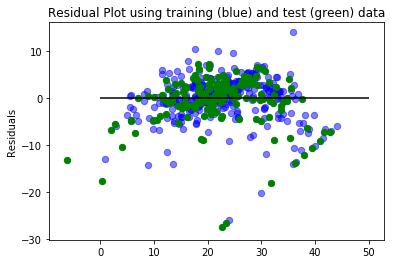

In [78]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c= 'b', s = 40, alpha = 0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c= 'g', s = 40 )
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

# Conclusion
To recap what has done till now,

explored the boston data set and then renamed its column names.

explored the boston data set using .DESCR, goal was to predict the housing prices using the given features.

Used Scikit learn to fit linear regression to the entire data set and calculated the mean squared error.

made a rain-test split and calculated the mean squared error for the training data and test data.

Plotted the residuals for the training and test datasets.